### Connecting Google Drive..

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
cd /content/drive/MyDrive/SF_LAB_2/LSB_Image_Steganography/

/content/drive/MyDrive/SF_LAB_2/LSB_Image_Steganography


In [4]:
!pwd
!ls

/content/drive/MyDrive/SF_LAB_2/LSB_Image_Steganography
Assignment.pdf	cover_1.png  cover_2.png  LSB_Image_Steganography.ipynb


### Demo Working of random shuffling on deck of 52 cards let's say..

In [5]:
import random

In [6]:
deck = list(range(1,53))
print("Original deck")
print(deck)

Original deck
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [7]:
random.seed(10) #Providing seed as 10 i.e. seed is the secret key
random.shuffle(deck)
print("Deck after random shuffling")
print(deck) 

Deck after random shuffling
[23, 38, 41, 48, 43, 17, 2, 33, 4, 19, 26, 47, 7, 29, 35, 8, 39, 45, 49, 25, 6, 15, 9, 22, 10, 46, 13, 12, 20, 36, 50, 27, 40, 24, 16, 5, 21, 44, 34, 51, 11, 42, 18, 32, 30, 14, 1, 52, 31, 28, 3, 37]


In [8]:
random.seed(10) # Here, we provide or instantiate the random generator with the same seed
deck_d = list(range(1,53)) # Again its deck of 52 cards
print("Original deck")
print(deck_d)
random.shuffle(deck_d)
print("Randomly shuffled deck")
print(deck_d)


Original deck
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Randomly shuffled deck
[23, 38, 41, 48, 43, 17, 2, 33, 4, 19, 26, 47, 7, 29, 35, 8, 39, 45, 49, 25, 6, 15, 9, 22, 10, 46, 13, 12, 20, 36, 50, 27, 40, 24, 16, 5, 21, 44, 34, 51, 11, 42, 18, 32, 30, 14, 1, 52, 31, 28, 3, 37]


In [9]:
print("First randomly shuffled deck, ", deck)
print("Again randomly shuffled deck with seed 10", deck_d)

First randomly shuffled deck,  [23, 38, 41, 48, 43, 17, 2, 33, 4, 19, 26, 47, 7, 29, 35, 8, 39, 45, 49, 25, 6, 15, 9, 22, 10, 46, 13, 12, 20, 36, 50, 27, 40, 24, 16, 5, 21, 44, 34, 51, 11, 42, 18, 32, 30, 14, 1, 52, 31, 28, 3, 37]
Again randomly shuffled deck with seed 10 [23, 38, 41, 48, 43, 17, 2, 33, 4, 19, 26, 47, 7, 29, 35, 8, 39, 45, 49, 25, 6, 15, 9, 22, 10, 46, 13, 12, 20, 36, 50, 27, 40, 24, 16, 5, 21, 44, 34, 51, 11, 42, 18, 32, 30, 14, 1, 52, 31, 28, 3, 37]


**As we can see from above output that these both are same. So, this idea can be used at both encryption and decryption side.**

# Working with one-channel

### Importing Image

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy

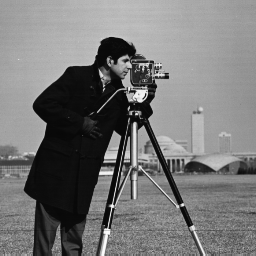

(256, 256, 3)


In [11]:
cv_image_1 = cv2.imread('cover_1.png')
cv2_imshow(cv_image_1); print(cv_image_1.shape)

In [ ]:
print(cv_image_1)

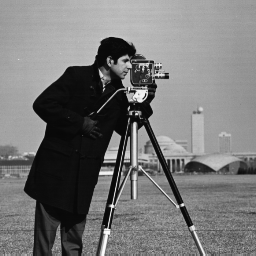

(256, 256)


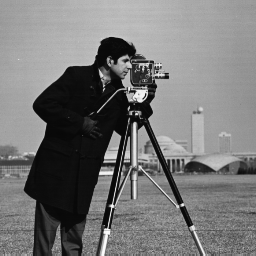

(256, 256, 3)


In [13]:
cv_image_1_grayscale = cv2.cvtColor(cv_image_1, cv2.COLOR_RGB2GRAY); 
cv2_imshow(cv_image_1_grayscale); print(cv_image_1_grayscale.shape)
cv2_imshow(cv_image_1); print(cv_image_1.shape)

In [14]:
print(cv_image_1_grayscale)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


In [15]:
rows = cv_image_1_grayscale.shape[0]
columns = cv_image_1_grayscale.shape[1]
print(rows,columns)
print("rows*columns:= ",rows*columns)
import math
print("Number of bits required to represent the length of secret message:= ", math.ceil(math.log2(rows*columns)))

256 256
rows*columns:=  65536
Number of bits required to represent the length of secret message:=  16


### How length of the secret image will be embedded?

In [16]:
def fib_sequence(n):
  fib_seq = [1,2]
  for i in range(2,n):
    fib_seq.append(fib_seq[i-1]+fib_seq[i-2])
  return fib_seq


In [17]:
fib_seq_first_16_digits = fib_sequence(16)
print(fib_seq_first_16_digits) 

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]


Now, these first 13 values will be used to hide the length of secret message

## Encryption

### Algorithm (Input: `Secret Message` & `Cover Image` & `Seed`):-
  1. Find the shuffled random pixels values after subtracting the `fib_seq_pixel` values. 
  2. Convert the Secret Image into binary form and embed the length of the secret message into the `fib-seq_pixel`.
  3. Replace the LSB of randomly shuffled pixels with the bits of secret message. 

In [18]:
# Functions for converting bits to string and vice-versa
import sys
if sys.version_info[0] >= 3:
    bin = "{0:#0b}".format
    from functools import reduce

def string2bits(chars):
     return bin(reduce(lambda x, y : (x<<7)+y, (ord(c) for c in chars), 1))[3:]

def bits2string(b):
  return ''.join(chr(int(''.join(x), 2)) for x in zip(*[iter(b)]*7))


In [116]:
# Forming deck of available pixels 
def randomly_shuffled_available_pixels(rows,columns,channels,fib_seq_first_16_digits,seed):
  shuffled_pixels = []
  for i in range(0,rows*columns*channels):
    if i in fib_seq_first_16_digits:
      continue
    else:
       shuffled_pixels.append(i)
  
  print("fib_16_digit_sequence",fib_seq_first_16_digits)
  print("Available Pixels before shuffling",shuffled_pixels)
  random.seed(seed) # Passing seed to the random generator
  random.shuffle(shuffled_pixels)
  print("Available Pixels after shuffling",shuffled_pixels)
  return shuffled_pixels

In [117]:
shuffled_available_pixels = randomly_shuffled_available_pixels(rows,columns,1,fib_seq_first_16_digits,10) # Here 10 is seed

fib_16_digit_sequence [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]
Available Pixels before shuffling [0, 4, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

In [118]:
# Randomly Large secret meesage
def generate_random_bits(n):
  random_bits=""
  for i in range(n):
    x = random.random()
    if x>=0.5:
      random_bits = random_bits + "1"
    else:
      random_bits = random_bits + "0"
  return random_bits

In [119]:
Secret_Msg = "The meeting is regarding a discussion on Budget 2021"
#Secret_Msg = "8078698408 9024 27 88 91"
print(Secret_Msg)

The meeting is regarding a discussion on Budget 2021


In [120]:
Secret_msg_binary = string2bits(Secret_Msg);
#Secret_msg_string = bits2string(Secret_msg_binary);
#Secret_msg_binary = generate_random_bits(48000)
print("Secret Message in binary", Secret_msg_binary)
print("Length",len(Secret_msg_binary))
#print(bits2string(Secret_msg_binary))

Secret Message in binary 1010100110100011001010100000110110111001011100101111010011010011101110110011101000001101001111001101000001110010110010111001111100001111001011001001101001110111011001110100000110000101000001100100110100111100111100011111010111100111110011110100111011111101110010000011011111101110010000010000101110101110010011001111100101111010001000000110010011000001100100110001
Length 364


In [125]:
print(cv_image_1_grayscale); print(cv_image_1_grayscale.shape)
cv_image_1_grayscale_copy = cv_image_1_grayscale.copy()
cv_image_1_grayscale_1_D = cv_image_1_grayscale_copy.reshape(-1)
print(cv_image_1_grayscale_1_D); print(cv_image_1_grayscale_1_D.shape)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
(256, 256)
[156 159 158 ... 133 130 113]
(65536,)


In [126]:
print(format(len(Secret_msg_binary),'016b')) # Here 16 because the maximum required bits for length are 16
Secret_msg_length_binary = format(len(Secret_msg_binary),'016b')
print(Secret_msg_length_binary)

0000000101101100
0000000101101100


In [127]:
# Now first embed the length into pixels given by the fib_sequence
for i in range(len(fib_seq_first_16_digits)):
  fi_seq_digit = fib_seq_first_16_digits[i]
  current_pixel_value = cv_image_1_grayscale_1_D[fi_seq_digit]
  current_length_bit = Secret_msg_length_binary[i]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  #print(current_pixel_value_binary)
  current_pixel_value_binary = current_pixel_value_binary[:-1]+current_length_bit # Changing the last bit 
  print(current_pixel_value,current_length_bit,current_pixel_value_binary,int(current_pixel_value_binary,2))
  cv_image_1_grayscale_1_D[fi_seq_digit] = int(current_pixel_value_binary,2)

159 0 10011110 158
158 0 10011110 158
155 0 10011010 154
156 0 10011100 156
157 0 10011100 156
160 0 10100000 160
160 0 10100000 160
166 1 10100111 167
171 0 10101010 170
182 1 10110111 183
183 1 10110111 183
153 0 10011000 152
184 1 10111001 185
181 1 10110101 181
162 0 10100010 162
171 0 10101010 170


In [128]:
# Now embed the secret message bits into the shuffled available pixels
for i in range(len(Secret_msg_binary)):
  print("Secret Message Bit number:-> ", i)
  shuffled_pixel_number = shuffled_available_pixels[i]
  current_pixel_value = cv_image_1_grayscale_1_D[shuffled_pixel_number]
  current_Secret_msg_bit = Secret_msg_binary[i]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  #print(current_pixel_value_binary)
  current_pixel_value_binary = current_pixel_value_binary[:-1]+current_Secret_msg_bit # Changing the last bit 
  print(current_pixel_value,current_Secret_msg_bit,current_pixel_value_binary,int(current_pixel_value_binary,2))
  cv_image_1_grayscale_1_D[shuffled_pixel_number] = int(current_pixel_value_binary,2)

Secret Message Bit number:->  0
139 1 10001011 139
Secret Message Bit number:->  1
162 0 10100010 162
Secret Message Bit number:->  2
146 1 10010011 147
Secret Message Bit number:->  3
174 0 10101110 174
Secret Message Bit number:->  4
9 1 1001 9
Secret Message Bit number:->  5
31 0 11110 30
Secret Message Bit number:->  6
151 0 10010110 150
Secret Message Bit number:->  7
189 1 10111101 189
Secret Message Bit number:->  8
116 1 1110101 117
Secret Message Bit number:->  9
144 0 10010000 144
Secret Message Bit number:->  10
136 1 10001001 137
Secret Message Bit number:->  11
185 0 10111000 184
Secret Message Bit number:->  12
83 0 1010010 82
Secret Message Bit number:->  13
35 0 100010 34
Secret Message Bit number:->  14
10 1 1011 11
Secret Message Bit number:->  15
161 1 10100001 161
Secret Message Bit number:->  16
151 0 10010110 150
Secret Message Bit number:->  17
100 0 1100100 100
Secret Message Bit number:->  18
125 1 1111101 125
Secret Message Bit number:->  19
181 0 10110100 180

(256, 256)


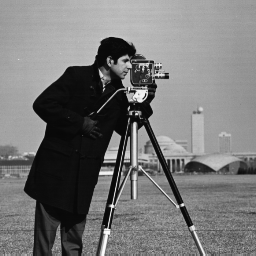

(256, 256)


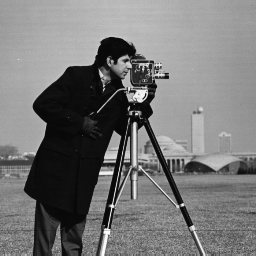

In [129]:
steganographed_image = cv_image_1_grayscale_1_D.reshape(rows,columns)
print(cv_image_1_grayscale.shape);cv2_imshow(cv_image_1_grayscale)
print(steganographed_image.shape);cv2_imshow(steganographed_image)

In [131]:
print("PSNR ",cv2.PSNR(cv_image_1_grayscale, steganographed_image),"dB" )

PSNR  73.6004734727369 dB


## Decryption

In [132]:
# Now first calculate the length of the embeded message
Secret_Msg_length_bits = ""
for i in range(len(fib_seq_first_16_digits)):

  fi_seq_digit = fib_seq_first_16_digits[i]
  current_pixel_value = cv_image_1_grayscale_1_D[fi_seq_digit]
  #print(current_pixel_value)
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  Secret_Msg_length_bits = Secret_Msg_length_bits + current_pixel_value_binary[-1]

print(Secret_Msg_length_bits)
Secret_Msg_length = int(Secret_Msg_length_bits,2)
print(Secret_Msg_length)

0000000101101100
364


In [133]:
# Now first calculate the length of the embeded message
Extracted_Secret_Msg_bits = ""
for i in range(Secret_Msg_length):
  shuffled_pixel_number = shuffled_available_pixels[i]
  current_pixel_value = cv_image_1_grayscale_1_D[shuffled_pixel_number]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  Extracted_Secret_Msg_bits = Extracted_Secret_Msg_bits + current_pixel_value_binary[-1]

print(Extracted_Secret_Msg_bits)
Extracted_Secret_Msg = bits2string(Extracted_Secret_Msg_bits)
print(Extracted_Secret_Msg)

1010100110100011001010100000110110111001011100101111010011010011101110110011101000001101001111001101000001110010110010111001111100001111001011001001101001110111011001110100000110000101000001100100110100111100111100011111010111100111110011110100111011111101110010000011011111101110010000010000101110101110010011001111100101111010001000000110010011000001100100110001
The meeting is regarding a discussion on Budget 2021


# Working with 3-channels

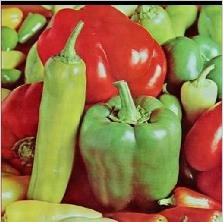

(222, 223, 3)


In [134]:
cv_image_2 = cv2.imread('cover_2.png')
cv2_imshow(cv_image_2);print(cv_image_2.shape)

In [135]:
rows_2 = cv_image_2.shape[0]
columns_2 = cv_image_2.shape[1]
channels = cv_image_2.shape[2]
print(rows_2,columns_2,channels)
print("rows*columns*3:= ",rows_2*columns_2*3)
import math
print("Number of bits required to represent the length of secret message:= ", math.ceil(math.log2(rows_2*columns_2*channels)))

222 223 3
rows*columns*3:=  148518
Number of bits required to represent the length of secret message:=  18


In [136]:
fib_seq_first_18_digits = fib_sequence(18)
print(fib_seq_first_18_digits) 
shuffled_available_pixels = randomly_shuffled_available_pixels(rows_2,columns_2,3,fib_seq_first_18_digits,10) # Here 10 is seed

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
fib_16_digit_sequence [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
Available Pixels before shuffling [0, 4, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 

In [137]:
cv_image_2_copy = cv_image_2.copy()
cv_image_2_1_D = cv_image_2_copy.reshape(-1)
print(cv_image_2_1_D.shape)

(148518,)


In [138]:
Secret_Msg ="The meeting is regarding a discussion on Budget 2021"
#Secret_Msg = "8078698408 9024 27 88 91"
print(Secret_Msg)

The meeting is regarding a discussion on Budget 2021


In [ ]:
# Randomly Large secret meesage
def generate_random_bits(n):
  random_bits=""
  for i in range(n):
    x = random.random()
    if x>=0.5:
      random_bits = random_bits + "1"
    else:
      random_bits = random_bits + "0"
  return random_bits

In [139]:
Secret_msg_binary = string2bits(Secret_Msg);
#Secret_msg_binary = generate_random_bits(32000)
#Secret_msg_string = bits2string(Secret_msg_binary);
print("Secret Message in binary", Secret_msg_binary)
print("Length",len(Secret_msg_binary))
#print(bits2string(Secret_msg_binary))

Secret Message in binary 1010100110100011001010100000110110111001011100101111010011010011101110110011101000001101001111001101000001110010110010111001111100001111001011001001101001110111011001110100000110000101000001100100110100111100111100011111010111100111110011110100111011111101110010000011011111101110010000010000101110101110010011001111100101111010001000000110010011000001100100110001
Length 364


In [140]:
print(len(Secret_msg_binary)) 
Secret_msg_length_binary = format(len(Secret_msg_binary),'018b') # Here 13 because the maximum required bits for length are 13
print(Secret_msg_length_binary)

364
000000000101101100


## Encryption

In [141]:
# Now first embed the length into pixels given by the fib_sequence
for i in range(len(fib_seq_first_18_digits)):
  fi_seq_digit = fib_seq_first_18_digits[i]
  current_pixel_value = cv_image_2_1_D[fi_seq_digit]
  current_length_bit = Secret_msg_length_binary[i]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  #print(current_pixel_value_binary)
  current_pixel_value_binary = current_pixel_value_binary[:-1]+current_length_bit # Changing the last bit 
  print(current_pixel_value,current_length_bit,current_pixel_value_binary,int(current_pixel_value_binary,2))
  cv_image_2_1_D[fi_seq_digit] = int(current_pixel_value_binary,2)

219 0 11011010 218
217 0 11011000 216
176 0 10110000 176
175 0 10101110 174
216 0 11011000 216
211 0 11010010 210
211 0 11010010 210
204 0 11001100 204
202 0 11001010 202
208 1 11010001 209
206 0 11001110 206
203 1 11001011 203
211 1 11010011 211
204 0 11001100 204
5 1 101 5
2 1 11 3
6 0 110 6
188 0 10111100 188


In [142]:
# Now embed the secret message bits into the shuffled available pixels
for i in range(len(Secret_msg_binary)):
  print("Secret Message Bit number:-> ", i)
  shuffled_pixel_number = shuffled_available_pixels[i]
  current_pixel_value = cv_image_2_1_D[shuffled_pixel_number]
  current_Secret_msg_bit = Secret_msg_binary[i]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  #print(current_pixel_value_binary)
  current_pixel_value_binary = current_pixel_value_binary[:-1]+current_Secret_msg_bit # Changing the last bit 
  print(current_pixel_value,current_Secret_msg_bit,current_pixel_value_binary,int(current_pixel_value_binary,2))
  cv_image_2_1_D[shuffled_pixel_number] = int(current_pixel_value_binary,2)

Secret Message Bit number:->  0
171 1 10101011 171
Secret Message Bit number:->  1
132 0 10000100 132
Secret Message Bit number:->  2
22 1 10111 23
Secret Message Bit number:->  3
62 0 111110 62
Secret Message Bit number:->  4
0 1 1 1
Secret Message Bit number:->  5
203 0 11001010 202
Secret Message Bit number:->  6
48 0 110000 48
Secret Message Bit number:->  7
34 1 100011 35
Secret Message Bit number:->  8
59 1 111011 59
Secret Message Bit number:->  9
213 0 11010100 212
Secret Message Bit number:->  10
44 1 101101 45
Secret Message Bit number:->  11
6 0 110 6
Secret Message Bit number:->  12
170 0 10101010 170
Secret Message Bit number:->  13
61 0 111100 60
Secret Message Bit number:->  14
76 1 1001101 77
Secret Message Bit number:->  15
89 1 1011001 89
Secret Message Bit number:->  16
36 0 100100 36
Secret Message Bit number:->  17
57 0 111000 56
Secret Message Bit number:->  18
84 1 1010101 85
Secret Message Bit number:->  19
242 0 11110010 242
Secret Message Bit number:->  20
52 

(222, 223, 3)


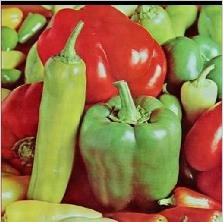

(222, 223, 3)


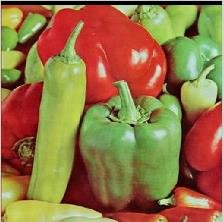

In [143]:
steganographed_image_2 = cv_image_2_1_D.reshape(rows_2,columns_2,3)
print(cv_image_2.shape);cv2_imshow(cv_image_2)
print(steganographed_image_2.shape);cv2_imshow(steganographed_image_2)

In [144]:
print("PSNR:- ",cv2.PSNR(cv_image_2, steganographed_image_2),"dB") 

PSNR:-  76.83829457422385 dB


## Decryption

In [145]:
# Now first calculate the length of the embeded message
Secret_Msg_length_bits = ""
for i in range(len(fib_seq_first_18_digits)):

  fi_seq_digit = fib_seq_first_18_digits[i]
  current_pixel_value = cv_image_2_1_D[fi_seq_digit]
  #print(current_pixel_value)
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  Secret_Msg_length_bits = Secret_Msg_length_bits + current_pixel_value_binary[-1]

print(Secret_Msg_length_bits)
Secret_Msg_length = int(Secret_Msg_length_bits,2)
print(Secret_Msg_length)

000000000101101100
364


In [146]:
# Now first calculate the length of the embeded message
Extracted_Secret_Msg_bits = ""
for i in range(Secret_Msg_length):
  shuffled_pixel_number = shuffled_available_pixels[i]
  current_pixel_value = cv_image_2_1_D[shuffled_pixel_number]
  current_pixel_value_binary = bin(current_pixel_value)[2:]
  Extracted_Secret_Msg_bits = Extracted_Secret_Msg_bits + current_pixel_value_binary[-1]

print(Extracted_Secret_Msg_bits)
Extracted_Secret_Msg = bits2string(Extracted_Secret_Msg_bits)
print(Extracted_Secret_Msg)

1010100110100011001010100000110110111001011100101111010011010011101110110011101000001101001111001101000001110010110010111001111100001111001011001001101001110111011001110100000110000101000001100100110100111100111100011111010111100111110011110100111011111101110010000011011111101110010000010000101110101110010011001111100101111010001000000110010011000001100100110001
The meeting is regarding a discussion on Budget 2021
